# Unsupervised Clustering of Board Game Reviews

_Ryan Harper_

In [1]:
import random
import numpy as np
from string import punctuation as punct
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import SpectralClustering
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import v_measure_score
from sklearn.feature_extraction.text import TfidfVectorizer

# for mac only: frog,blow,funk,glass,tink,submarine,purr,sosumi
def beep(audio): 
    os.system('afplay /System/Library/Sounds/' + audio +'.aiff')

# 1. Import and Clean Data

In [5]:
import pandas as pd

survey = pd.read_csv('../data/survey/survey.csv').dropna()

In [6]:
survey['cntry_codes'] = survey['cntry'].astype('category').cat.codes

In [7]:
survey.isnull().sum()

cntry          0
idno           0
year           0
tvtot          0
ppltrst        0
pplfair        0
pplhlp         0
happy          0
sclmeet        0
sclact         0
gndr           0
agea           0
partner        0
cntry_codes    0
dtype: int64

# Models

In [133]:
X = survey[survey.columns[~survey.columns.isin(['cntry','cntry_codes'])]]
y = survey['cntry_codes']

X_train, X_test, y_train, y_test = train_test_split(X, y.astype(int).ravel(), test_size=0.33, random_state=42)
beep('submarine')

#### _I would normally spend more time evaluating the PCA component reduction, but for this project I want to evaluate cluster performance_

### _K Means Clustering_

In [134]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

In [142]:
%%time
km_range = range(2,8)
km_predict = []
for i in km_range:
    # Declare and fit the model.
    km_predict.append(KMeans(n_clusters=i, random_state=42).fit_predict(X_train))

    #Predicted clusters.
    print('{} completed'.format(i),end=' | ')

2 completed | 3 completed | 4 completed | 5 completed | 6 completed | 7 completed | CPU times: user 379 ms, sys: 29.8 ms, total: 409 ms
Wall time: 215 ms


# 5. Evaluate (w/ different criterion)

## _V-Measurement Criterion_

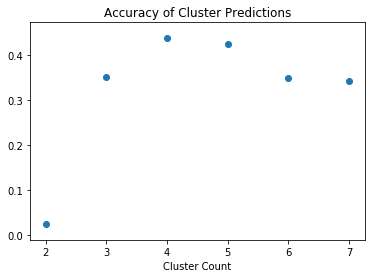

In [143]:
plt.scatter(x=[km_range],y=[v_measure_score(y_train,v) for v in km_predict])
plt.title('Accuracy of Cluster Predictions')
plt.xlabel('Cluster Count')
plt.show()

In [212]:
table = pd.crosstab(y_train, km_predict[4],margins = True)
table.index = list(survey.cntry.unique()) + ['total'];table

col_0,0,1,2,3,4,5,All
CH,384,0,0,0,582,0,966
CZ,200,0,0,0,609,0,809
DE,0,16,0,0,0,0,16
ES,655,0,0,0,898,0,1553
NO,0,0,294,368,0,280,942
SE,570,0,0,0,602,0,1172
total,1809,16,294,368,2691,280,5458


### _Adjusted Random Score Criterion_

In [140]:
from sklearn.metrics import adjusted_rand_score

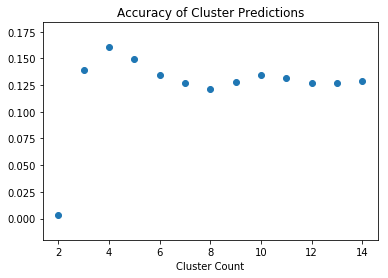

In [141]:
plt.scatter(x=[km_range],y=[adjusted_rand_score(y_train,v) for v in km_predict])
plt.title('Accuracy of Cluster Predictions')
plt.xlabel('Cluster Count')
# plt.ylim(0,.01)
plt.show()